In [60]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Fake data generation

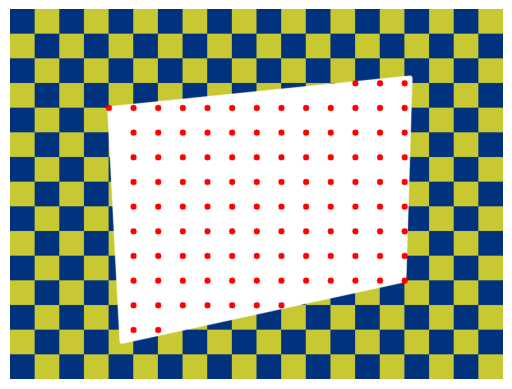

In [93]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Image size
width, height = 800, 600

# Create checkerboard background
tile_size = 40
img = np.zeros((height, width, 3), dtype=np.uint8)

for y in range(0, height, tile_size):
    for x in range(0, width, tile_size):
        color = (0, 50, 125) if (x // tile_size + y // tile_size) % 2 == 0 else (200, 200, 50)
        cv.rectangle(img, (x, y), (x + tile_size, y + tile_size), color, -1)

# Define quadrilateral corners (rectangle in perspective)
POINTS = np.array([(160, 160), (650, 110), (640, 440), (180, 540)], dtype=np.int32)


# Draw filled polygon
cv.fillConvexPoly(img, POINTS, color=(255, 255, 255))

# Draw outline
cv.polylines(img, [POINTS], isClosed=True, color=(255, 255, 255), thickness=3, lineType=cv.LINE_AA)

# Add simple pattern (grid of circles) inside polygon
step = 40
for y in range(0, height, step):
    for x in range(0, width, step):
        if cv.pointPolygonTest(POINTS, (x, y), False) >= 0:
            cv.circle(img, (x, y), 5, (255, 0, 0), -1)

plt.imshow(img)
plt.axis("off")
plt.show()

## Affine 3-points transformation

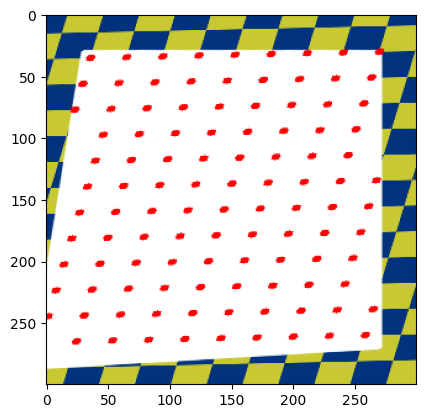

In [97]:
SRC_POINTS = POINTS[1:].astype(np.float32)
PAD = 30
DST_POINTS = np.array([(PAD, PAD), (300 - PAD, PAD), (300 - PAD, 300 - PAD)], dtype=np.float32)

# Compute affine transform matrix
M = cv.getAffineTransform(SRC_POINTS, DST_POINTS)

# Suppose you already have the original image (img)
# Warp using affine transform
warped = cv.warpAffine(img, M, (300, 300))

plt.imshow(warped)

## Perspective 4-point transform

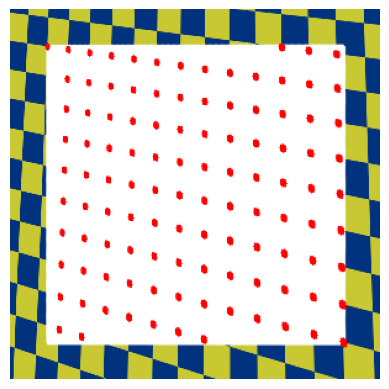

In [98]:
# Select all 4 points as float32
SRC_POINTS = POINTS.astype(np.float32)

# Padding around the rectangle
PAD = 30
DST_POINTS = np.array([
    (PAD, PAD),
    (300 - PAD, PAD),
    (300 - PAD, 300 - PAD),
    (PAD, 300 - PAD)
], dtype=np.float32)

# Compute perspective transform matrix
M = cv.getPerspectiveTransform(SRC_POINTS, DST_POINTS)

# Warp perspective
warped = cv.warpPerspective(img, M, (300, 300))

# Show result
plt.imshow(warped)
plt.axis("off")
plt.show()